In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce

# Import EPRI Data

In [61]:
EPRI = 'EPRI.xlsx'

df_FES = pd.read_excel(EPRI, sheet_name = 'Fire Event Summaries')
df_FEA = pd.read_excel(EPRI, sheet_name = 'Fire Event Attributes')
df_FSE = pd.read_excel(EPRI, sheet_name = 'Fire Severity Evaluation')
df_FTS = pd.read_excel(EPRI, sheet_name = 'Fire Timeline and Suppression')
df_PR  = pd.read_excel(EPRI, sheet_name = 'Plant Response')

df_epri = [df_FES, df_FEA, df_FSE, df_FTS, df_PR]

In [62]:
# Set FireID as index

df_FES.set_index('FireID',inplace=True)
df_FEA.set_index('FireID',inplace=True)
df_FSE.set_index('FireID',inplace=True)
df_FTS.set_index('FireID',inplace=True)
df_PR.set_index('FireID', inplace=True)

# Merge

In [60]:
# # Concatenation Method
# df_main = pd.concat(df_epri,axis=1,sort=False).reset_index()
# df_main.rename(columns = {'index':'FireID'})

In [63]:
 df_main = reduce(lambda x,y: pd.merge(x,y, on='FireID', how='outer', sort = True), df_epri)

In [64]:
df_main.columns

Index(['Event Date_FES', 'Disposition_FES', 'Outside PA', 'Plant Area',
       'Building', 'System', 'Component Group', 'Component', 'Voltage',
       'Current Type', 'Event Date_FEA', 'Disposition_FEA', 'Fire Cause',
       'Group', 'Type', 'Form', 'Fire Type', 'Smoke', 'Temperature',
       'Damage Extent', 'Collated Damage', 'Event Date_FSE', 'Disposition_FSE',
       'Review Status:', 'Automatic Determination', 'Unnamed: 5', 'Unnamed: 6',
       'Event Date_FTS', 'Diposition_FTS', 'Ignition', 'Discovery',
       'Duration Certainty', 'Duration', 'Detection Method',
       'Detection Performance', 'Suppression Method', 'Suppression Agent',
       'Unnamed: 11', 'Unnamed: 12', 'Event Date_PR', 'Diposition_PR',
       'Mode Prior', 'Mode After', 'Power Level Prior', 'Power Level After',
       'Power Effect', 'EAL Declaration'],
      dtype='object')

In [133]:
df_main.to_excel('pd_merge2.xlsx')

In [57]:
df_main.reset_index(drop=True, inplace=True)

In [65]:
df_main.shape

(2205, 47)

In [28]:
df_main1 = pd.merge(df_FES, df_FEA, on = ['FireID', 'Event Date'], how = 'outer', sort = True)
df_main2 = pd.merge(df_FES, df_FEA, on = ['FireID'], how = 'outer', sort = True, suffixes = ('_fes', '_fea'))
df_main3 = pd.merge(df_FES, df_FEA, on = ['FireID', 'Disposition'], how = 'outer', sort = True)


In [27]:
print(df_main1.shape)
print(df_main2.shape)
print(df_main3.shape)

(2724, 23)
(2190, 24)
(2770, 23)


In [30]:
df_main2.columns

Index(['No._fes', 'FireID', 'Event Date_fes', 'Disposition_fes', 'Outside PA',
       'Plant Area', 'Building', 'System', 'Component Group', 'Component',
       'Voltage', 'Current Type', 'No._fea', 'Event Date_fea',
       'Disposition_fea', 'Fire Cause', 'Group', 'Type', 'Form', 'Fire Type',
       'Smoke', 'Temperature', 'Damage Extent', 'Collated Damage'],
      dtype='object')

In [36]:
df_main_fse = pd.merge([df_main2, df_FSE, df_FTS, df_PR], on = ['FireID'], how ={'right','outer'}, sort = True, suffixes = (None, '_fse', '_fts', '_pr'))

TypeError: merge() missing 1 required positional argument: 'right'

In [32]:
df_main_fse.columns

Index(['No._fes', 'FireID', 'Event Date_fes', 'Disposition_fes', 'Outside PA',
       'Plant Area', 'Building', 'System', 'Component Group', 'Component',
       'Voltage', 'Current Type', 'No._fea', 'Event Date_fea',
       'Disposition_fea', 'Fire Cause', 'Group', 'Type', 'Form', 'Fire Type',
       'Smoke', 'Temperature', 'Damage Extent', 'Collated Damage', 'No.',
       'Event Date', 'Disposition', 'Review Status:',
       'Automatic Determination', 'Unnamed: 6', 'Unnamed: 7'],
      dtype='object')

In [8]:
print(df_FES.shape)
print(df_FEA.shape)

(2186, 12)
(1972, 13)


In [24]:
print((df_FES['Event Date'].shape))
print((df_FEA['Event Date'].shape))
print((df_main2['Event Date_x'].shape))
print((df_main2['Event Date_y'].shape))

(2186,)
(1972,)
(2190,)
(2190,)


# Data Cleaning

In [69]:
df_main.Disposition_FES.unique()

array(['Undetermined', 'Not Challenging', 'Challenging', nan,
       'Not Evaluated', 'Potentially Challenging',
       'Undetermined (NC‐PC) ', 'Undetermined (PC‐CH)',
       'Undetermined (NC‐PC)', 'Not Challenging ',
       'Potentially Challenging ', ' Not\xa0Challenging',
       'Not\xa0Challenging', 'Potentially\xa0Challenging',
       'Undetermined\xa0(NC‐PC)', 'Undetermined\xa0(PC‐CH)',
       ' Undetermined\xa0(PC‐CH)', ' Challenging',
       ' Undetermined\xa0(NC‐PC)', ' Potentially\xa0Challenging',
       'Undetermined(NC‐PC)', 'Undetermined (PC-CH)',
       'Not+D20421:D20432Challenging'], dtype=object)

In [76]:
df_main['Disposition_FES'] = df_main['Disposition_FES'].replace(['Potentially\xa0Challenging', ' Potentially\xa0Challenging', 'Potentailly Challenging ',
                                                      ' Not\xa0Challenging', 'Not\xa0Challenging',
                                                       'Undetermined\xa0(NC‐PC)', 'Undetermined\xa0(PC‐CH)', ' Undetermined\xa0(PC‐CH)', ' Undetermined\xa0(NC‐PC)',
                                                      'Undetermined(NC‐PC)', 'Not+D20421:D20432Challenging', ' Challenging', 'Undetermined (NC‐PC) ', 'Undetermined (PC-CH)'],
                                                      ['Potentially Challenging', 'Potentially Challenging', 'Potentially Challenging',
                                                      'Not Challenging', 'Not Challenging', 
                                                      'Undetermined (NC‐PC)', 'Undetermined (PC‐CH)', 'Undetermined (PC‐CH)', 'Undetermined (NC‐PC)',
                                                      'Undetermined (NC‐PC)', 'Not Challenging', 'Challenging', 'Undetermined (NC‐PC)', 'Undetermined (PC‐CH)'])

In [77]:
df_main.Disposition_FES.unique()

array(['Undetermined', 'Not Challenging', 'Challenging', nan,
       'Not Evaluated', 'Potentially Challenging', 'Undetermined (NC‐PC)',
       'Undetermined (PC‐CH)', 'Not Challenging ',
       'Potentially Challenging '], dtype=object)

In [79]:
disp_feabf = df_main.Disposition_FEA.unique()
disp_feabf

array(['Undetermined', 'Not Challenging', 'Challenging', nan,
       'Not Evaluated', 'Potentially Challenging', 'Undetermined (NC‐PC)',
       'Undetermined (PC‐CH)', 'otentially Challenging',
       'Undetermined (PC‐CH）', 'Undetermined (PC-CH）',
       'Undetermined(NC‐PC)', 'NotChallenging', 'Undetermined(PC‐CH)',
       'PotentiallyChallenging', 'Undetermined(NC‐PC',
       ': Not Challenging', 'Undetermined (NC‐PC) FireID: 10614',
       'Unknown', 'Undetermined (NC‐PC', 'Undetermined (PC‐CH',
       'Other electrical or electronic equipment', 'Not Challengin'],
      dtype=object)

In [102]:
df_main['Disposition_FEA'] = df_main['Disposition_FEA'].replace(['Undetermined\xa0(NC‐PC)', 'Undetermined\xa0(PC‐CH) ', 'Undetermined\xa0(NC‐PC) ',
                                                       'Undetermined\xa0(PC‐CH)', 'Potentially\xa0Challenging', 
                                                       'Not\xa0Evaluated ', 'Not\xa0Evaluated', 'Potentially\xa0Challenging ',
                                                                 ': Not Challenging', 'Undetermined (NC‐PC) FireID: 10614',
                                                                'NotChallenging', 'otentially Challenging', 'PotentiallyChallenging',
                                                                'Not Challengin', 'Undetermined (PC‐CH', 'Undetermined(NC‐PC',
                                                                'Undetermined (PC-CH）', 'Undetermined (PC‐CH）', 'Undetermined(NC‐PC)', 'Undetermined(PC‐CH)'],
                                                      ['Undetermined (NC‐PC)', 'Undetermined (PC‐CH)', 'Undetermined (NC‐PC)',
                                                       'Undetermined (PC‐CH)', 'Potentailly Challenging',
                                                      'Not Evaluated', 'Not Evaluated', 'Potentailly Challenging',
                                                      'Not Challenging', 'Undetermined (NC‐PC)',
                                                      'Not Challenging', 'Potentially Challenging', 'Potentially Challenging',
                                                      'Not Challenging', 'Undetermined (PC‐CH)','Undetermined (NC‐PC)',
                                                      'Undetermined (PC‐CH)', 'Undetermined (PC‐CH)', 'Undetermined (NC‐PC)', 'Undetermined (PC‐CH)'])

In [103]:
df_main.Disposition_FEA.unique()

array(['Undetermined', 'Not Challenging', 'Challenging', nan,
       'Not Evaluated', 'Potentially Challenging', 'Undetermined (NC‐PC)',
       'Undetermined (PC‐CH)', 'Unknown',
       'Other electrical or electronic equipment'], dtype=object)

In [105]:
disp_fsebf = df_main.Disposition_FSE.unique()
disp_fsebf

array(['Undetermined', 'Not Challenging', 'Challenging', nan,
       'Not Evaluated', 'Potentially Challenging', 'Undetermined (NC‐PC)',
       'Undetermined (PC‐CH)', 'Preliminary', 'Undetermined\xa0(NC‐PC)',
       'Undetermined\xa0(PC‐CH) ', 'Undetermined\xa0(NC‐PC) ',
       'Undetermined\xa0(PC‐CH)', 'Potentially\xa0Challenging',
       'Not\xa0Evaluated ', 'Not\xa0Evaluated',
       'Potentially\xa0Challenging '], dtype=object)

In [106]:
df_main['Disposition_FSE'] = df_FSE['Disposition_FSE'].replace(['Undetermined\xa0(NC‐PC)', 'Undetermined\xa0(PC‐CH) ',
                                                               'Undetermined\xa0(NC‐PC) ', 'Undetermined\xa0(PC‐CH)',
                                                               'Potentially\xa0Challenging', 'Not\xa0Evaluated ', 'Not\xa0Evaluated',
                                                               'Potentially\xa0Challenging '],
                                                      ['Undetermined (NC‐PC)', 'Undetermined (PC‐CH)',
                                                      'Undetermined (NC‐PC)', 'Undetermined (PC‐CH)',
                                                      'Potentially Challenging', 'Not Evaluated', 'Not Evaluated',
                                                      'Potentially Challenging'])

In [107]:
df_main.Disposition_FSE.unique()

array(['Undetermined', 'Not Challenging', 'Challenging', nan,
       'Not Evaluated', 'Potentially Challenging', 'Undetermined (NC‐PC)',
       'Undetermined (PC‐CH)', 'Preliminary'], dtype=object)

In [110]:
disp_ftsbf = df_main.Diposition_FTS.unique()
disp_ftsbf

array(['Undetermined', 'Not\xa0Challenging', 'Challenging', nan,
       'Not\xa0Evaluated', 'Potentially\xa0Challenging',
       'Undetermined\xa0(NC‐PC)', 'Undetermined\xa0(PC‐CH)',
       'Challenging ', 'Undetermined\xa0(NC‐PC) ', 'Not\xa0Challenging ',
       'Potentially\xa0Challenging ', 'Not Challenging',
       'Potentially Challenging', 'Undetermined (NC‐PC)',
       'Undetermined (PC‐CH)',
       'Other plant personnel (in vicinity or passerby)', 'Not Evaluated'],
      dtype=object)

In [111]:
df_main['Diposition_FTS'] = df_main['Diposition_FTS'].replace(['Not\xa0Challenging', 'Not\xa0Evaluated', 'Potentially\xa0Challenging',
                                                              'Undetermined\xa0(NC‐PC)', 'Undetermined\xa0(PC‐CH)', 'Undetermined\xa0(NC‐PC) ',
                                                              'Not\xa0Challenging ', 'Potentially\xa0Challenging '],
                                                              ['Not Challenging', 'Not Evaluated', 'Potentially Challenging',
                                                              'Undetermined (NC‐PC)', 'Undetermined (PC‐CH)', 'Undetermined (NC‐PC)',
                                                              'Not Challenging', 'Potentially Challenging'])

In [112]:
df_main.Diposition_FTS.unique()

array(['Undetermined', 'Not Challenging', 'Challenging', nan,
       'Not Evaluated', 'Potentially Challenging', 'Undetermined (NC‐PC)',
       'Undetermined (PC‐CH)', 'Challenging ',
       'Other plant personnel (in vicinity or passerby)'], dtype=object)

In [113]:
disp_prbf = df_main.Diposition_PR.unique()
disp_prbf

array(['Undetermined', 'Not Challenging', 'Challenging', nan,
       'Not Evaluated', 'Potentially Challenging', 'Undetermined (NC‐PC)',
       'Undetermined (PC‐CH)', 'Unusual Event', 'Cold Shutdown',
       'Not Challenging ', 'Undetermined\xa0(PC‐CH) ',
       ' Potentially\xa0Challenging ', 'Not\xa0Challenging',
       ' Undetermined\xa0(NC‐PC)', 'Potentially\xa0Challenging',
       ' Not\xa0Challenging ', 'Not\xa0Challenging ',
       'Potentially\xa0Challenging ', 'Undetermined\xa0(NC‐PC) ',
       'Undetermined\xa0(PC‐CH)', ' Potentially\xa0Challenging',
       'Undetermined\xa0(NC‐PC)', 'Challenging ', ' Not\xa0Challenging',
       ' Challenging', '9/7/2006 ', ' Undetermined\xa0(PC‐CH)',
       ': Potentially\xa0Challenging', ' Undetermined\xa0(NC‐PC) ',
       ': Not\xa0Challenging ', ' Challenging ', ' Not Challenging',
       ' Undetermined (NC‐PC)', 'Refueling', 'Undetermined (NC‐PC',
       ': Undetermined (NC‐PC)', ': Undetermined (PC‐CH)',
       'Undetermined (NC‐PC) R'

In [124]:
df_main['Diposition_PR'] = df_main['Diposition_PR'].replace(['Undetermined\xa0(PC‐CH) ', ' Potentially\xa0Challenging ',
                                                            'Not\xa0Challenging', ' Undetermined\xa0(NC‐PC)', 'Potentially\xa0Challenging',
                                                            ' Not\xa0Challenging ', 'Not\xa0Challenging ',
                                                            'Potentially\xa0Challenging ', 'Undetermined\xa0(NC‐PC) ',
                                                             'Undetermined\xa0(PC‐CH)', ' Potentially\xa0Challenging',
                                                             'Undetermined\xa0(NC‐PC)', 'Challenging ', ' Not\xa0Challenging',
                                                            ' Challenging', ' Undetermined\xa0(PC‐CH)',
                                                            ': Potentially\xa0Challenging', ' Undetermined\xa0(NC‐PC) ',
                                                            ': Not\xa0Challenging ', ' Challenging ', ' Not Challenging',
                                                            ': Undetermined (NC‐PC)', ': Undetermined (PC‐CH)',
                                                            ' Undetermined (NC‐PC)', 'Undetermined (NC‐PC',
                                                            'Undetermined (NC‐PC) R', 'Not Challengin', ' Potentially Challenging',
                                                            'Not Challenging '],
                                                            ['Undetermined (PC‐CH)', 'Potentially Challenging',
                                                            'Not Challenging', 'Undetermined (NC‐PC)', 'Potentially Challenging',
                                                            'Not Challenging', 'Not Challenging',
                                                            'Potentially Challenging', 'Undetermined (NC‐PC)',
                                                            'Undetermined (PC‐CH)', 'Potentially Challenging',
                                                            'Undetermined (NC‐PC)', 'Challenging', 'Not Challenging',
                                                            'Challenging', 'Undetermined (PC‐CH)',
                                                            'Potentially Challenging', 'Undetermined (NC‐PC)',
                                                            'Not Challenging', 'Challenging', 'Not Challenging',
                                                            'Undetermined (NC‐PC)', 'Undetermined (PC‐CH)',
                                                            'Undetermined (NC‐PC)', 'Undetermined (NC‐PC)',
                                                            'Undetermined (NC‐PC)', 'Not Challenging', 'Potentially Challenging',
                                                            'Not Challenging'])

In [125]:
df_main.Diposition_PR.unique()

array(['Undetermined', 'Not Challenging', 'Challenging', nan,
       'Not Evaluated', 'Potentially Challenging', 'Undetermined (NC‐PC)',
       'Undetermined (PC‐CH)', 'Unusual Event', 'Cold Shutdown',
       '9/7/2006 ', 'Refueling', '10/11/1991'], dtype=object)

In [126]:
df_main.columns

Index(['Event Date_FES', 'Disposition_FES', 'Outside PA', 'Plant Area',
       'Building', 'System', 'Component Group', 'Component', 'Voltage',
       'Current Type', 'Event Date_FEA', 'Disposition_FEA', 'Fire Cause',
       'Group', 'Type', 'Form', 'Fire Type', 'Smoke', 'Temperature',
       'Damage Extent', 'Collated Damage', 'Event Date_FSE', 'Disposition_FSE',
       'Review Status:', 'Automatic Determination', 'Unnamed: 5', 'Unnamed: 6',
       'Event Date_FTS', 'Diposition_FTS', 'Ignition', 'Discovery',
       'Duration Certainty', 'Duration', 'Detection Method',
       'Detection Performance', 'Suppression Method', 'Suppression Agent',
       'Unnamed: 11', 'Unnamed: 12', 'Event Date_PR', 'Diposition_PR',
       'Mode Prior', 'Mode After', 'Power Level Prior', 'Power Level After',
       'Power Effect', 'EAL Declaration'],
      dtype='object')

In [132]:
df_main['Fire Type'].unique()

array(['Arc/electric discharge',
       'Flaming combustion – external to component', nan,
       'Smoldering combustion – internal to component',
       'Flaming combustion – internal to component', 'Explosion',
       'Unknown', 'laming combustion – external to component',
       'Other (specify)',
       'Fire not observed and fire type indeterminate from post‐inspectio',
       'Overheating – no smoldering or flaming combustion',
       'No Fire\xa0‐\xa0False actuation of detection device',
       'Flamingcombustion–internaltocomponent',
       'Firenotobservedandfiretypeindeterminatefrompost‐inspectio',
       'Firenotobservedandfiretypeindeterminatefrompost‐inspectio\nFireTypeUnknown:',
       'Smolderingcombustion–internaltocomponent',
       'Flamingcombustion–externaltocomponent',
       'Overheating–nosmolderingorflamingcombustion',
       'Smolderingcombustion–externaltocomponent',
       'Arc/electricdischarge', 'NoFire‐Falseactuationofdetectiondevice',
       'Other(specif

In [136]:
df_main['Fire Type'] = df_main['Fire Type'].replace(['laming combustion – external to component', 
                                                     'Flamingcombustion–externaltocomponent',
                                                    ': Flaming combustion – external to component',
                                                    'Flaming combustion – external to component '], 'Flaming combustion – external to component') 

In [138]:
df_main['Fire Type'] = df_main['Fire Type'].replace(['Smolderingcombustion–internaltocomponent',
                                                    'Smoldering combustion – internal to componen'],
                                                    'Smoldering combustion – internal to component')

In [148]:
df_main['Fire Type'] = df_main['Fire Type'].replace(['Smolderingcombustion–externaltocomponent'],
                                                    'Smoldering combustion – external to component')

In [140]:
df_main['Fire Type'] = df_main['Fire Type'].replace(['Flamingcombustion–internaltocomponent',
                                                    'Flaming combustion – internal to componen',
                                                    ': Flaming combustion – internal to component'], 
                                                    'Flaming combustion – internal to component')

In [142]:
df_main['Fire Type'] = df_main['Fire Type'].replace(['Fire not observed and fire type indeterminate from post‐inspectio',
                                                    'Firenotobservedandfiretypeindeterminatefrompost‐inspectio',
                                                    'Firenotobservedandfiretypeindeterminatefrompost‐inspectio\nFireTypeUnknown:',
                                                    ' Fire not observed and fire type indeterminate from post‐inspectio',
                                                    'Fire not observed and fire type indeterminate from post‐inspectio\n'], 
                                                    'Fire not observed and fire type indeterminate from post‐inspection')

In [144]:
df_main['Fire Type'] = df_main['Fire Type'].replace(['Arc/electricdischarge',
                                                    ': Arc/electric discharge',
                                                    ' Arc/electric discharge'],
                                                   'Arc/electric discharge')

In [146]:
df_main['Fire Type'] = df_main['Fire Type'].replace(['No Fire\xa0‐\xa0False actuation of detection device',
                                                    'NoFire‐Falseactuationofdetectiondevice'],
                                                   'No Fire ‐ False actuation of detection device') 

In [152]:
df_main['Fire Type'] = df_main['Fire Type'].replace(['Overheating – no  or flaming combustion',
                                                    'Overheating–nosmolderingorflamingcombustion',
                                                    'verheating – no smoldering or flaming combustion'],
                                                    'Overheating – no smoldering or flaming combustion')

In [156]:
df_main['Fire Type'] = df_main['Fire Type'].replace(['Other(specify)',
                                                    'Other (specify', 'Mechanicalequipmentmalfunction/failure'],
                                                   ['Other (specify)', 
                                                    'Other (specify)', 'Mechanical equipment malfunction/failure'])

In [204]:
df_main['Fire Type'] = df_main['Fire Type'].replace(['Mechanical equipment malfunction/failure',
                                                     'Overheated Material (lube oil, pump packing, thermal insulation, etc.)',
                                                     'Other electrical or electronic equipment', 
                                                     'Hot work (cutting/welding/grinding/etc.)', 
                                                     'Light smoke coming from ignition source\xa0‐\xa0minor or no visibility reduction in vicinity of fire', 
                                                     'Temporary electrical wiring or equipment'],
                                                   np.nan)

array(['Arc/electric discharge',
       'Flaming combustion – external to component', nan,
       'Smoldering combustion – internal to component',
       'Flaming combustion – internal to component', 'Explosion',
       'Unknown', 'Other (specify)',
       'Fire not observed and fire type indeterminate from post‐inspection',
       'Overheating – no smoldering or flaming combustion',
       'No Fire ‐ False actuation of detection device',
       'Smoldering combustion – external to component'], dtype=object)

In [206]:
df_main['Fire Type'].value_counts()

Flaming combustion – external to component                            722
Flaming combustion – internal to component                            304
Smoldering combustion – internal to component                         242
Overheating – no smoldering or flaming combustion                     223
Arc/electric discharge                                                135
Smoldering combustion – external to component                         115
Other (specify)                                                        99
Fire not observed and fire type indeterminate from post‐inspection     45
Unknown                                                                32
Explosion                                                              14
No Fire ‐ False actuation of detection device                          11
Name: Fire Type, dtype: int64

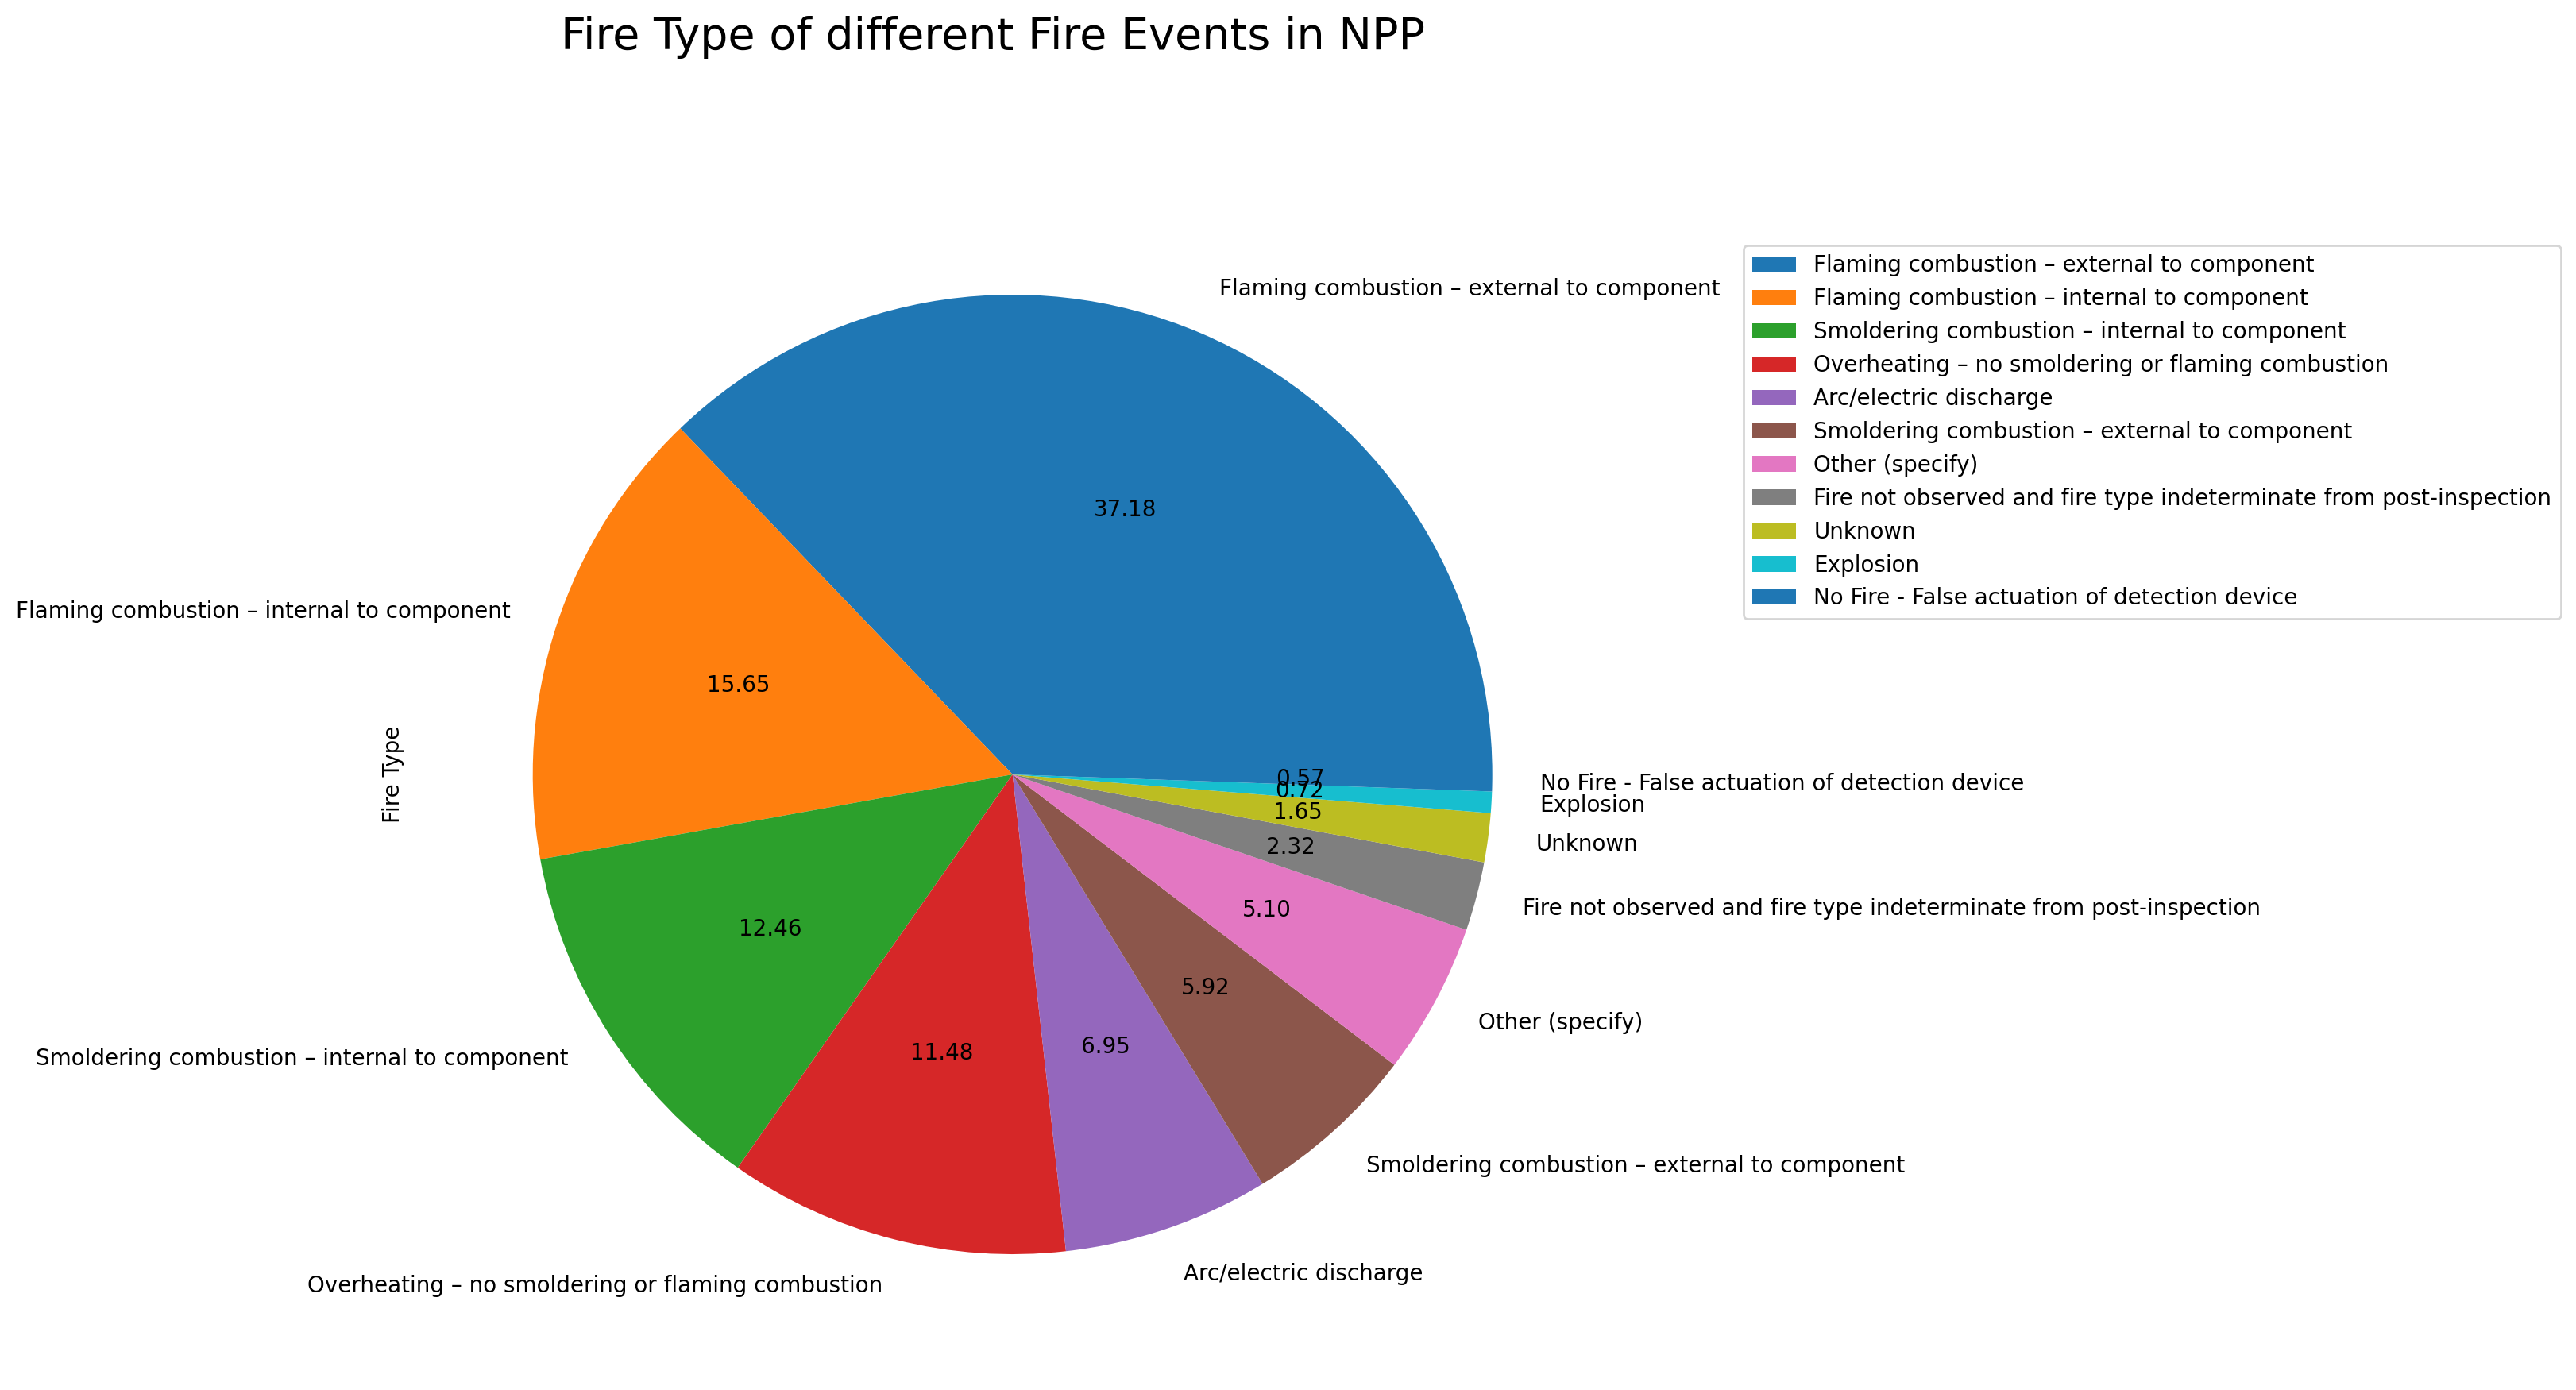

In [239]:
fig = plt.figure(figsize=(10,10), dpi=200)
ax = plt.subplot(111)
df_main['Fire Type'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10)
#plt.legend(loc='upper left')
fig.suptitle('Fire Type of different Fire Events in NPP', fontsize=20)
ax.legend(bbox_to_anchor=(1.1, 0.95))
plt.show()

In [208]:
df_main['Fire Type'].value_counts()

Flaming combustion – external to component                            722
Flaming combustion – internal to component                            304
Smoldering combustion – internal to component                         242
Overheating – no smoldering or flaming combustion                     223
Arc/electric discharge                                                135
Smoldering combustion – external to component                         115
Other (specify)                                                        99
Fire not observed and fire type indeterminate from post‐inspection     45
Unknown                                                                32
Explosion                                                              14
No Fire ‐ False actuation of detection device                          11
Name: Fire Type, dtype: int64

In [165]:
df_main['Fire Cause'].value_counts()

Electrical failure resulting in overheating materials                                          479
Hot work (cutting/welding/grinding/etc.)                                                       369
Overheated Material (lube oil, pump packing, thermal insulation, etc.)                         231
Electrical arcing or sparks (non‐HEAF)                                                         116
Hotwork(cutting/welding/grinding/etc.)                                                         100
Electricalfailureresultinginoverheatingmaterials                                                98
Other (other personnel error, natural effect, etc. specify in comments)                         97
Unknown                                                                                         94
Mechanical equipment malfunction/failure                                                        66
OverheatedMaterial(lubeoil,pumppacking,thermalinsulation,etc.)                                  59
Electrical

In [164]:
bfrfcm = df_main['Fire Cause'].unique()
bfrfcm

array(['High Energy Arc Fault', 'Electrical arcing or sparks (non‐HEAF)',
       'Mechanical equipment malfunction/failure', nan,
       'Electrical failure resulting in overheating materials',
       'Hot work (cutting/welding/grinding/etc.)',
       'Overheated Material (lube oil, pump packing, thermal insulation, etc.)',
       'Other (other personnel error, natural effect, etc. specify in comments)',
       'Misuse of heating devices', 'Unknown',
       'Personnel error during test and maintenance activity',
       'Explosion (hydrogen gas ignition, fuel vapor ignition, other volatile fluid vapor ignition)',
       'High Energy Arc Fault (HEAF)', 'Mechanical malfunction/failure',
       'Electrical Failure (overheating, spark, HEAF)',
       'Explosion (hydrogen gas ignition, fuel vapor ignition, other volatile fluid vapor ignition）',
       'Explosion (hydrogen gas ignition, fuel vapor ignition)',
       'Personnel error: Misuse of heating devices',
       'Electrical malfunction/

In [166]:
df_main['Fire Cause'] = df_main['Fire Cause'].replace(['High Energy Arc Fault', 'HighEnergyArcFault(HEAF)',
                                                      'High Energy Arc Fault (HEAF'],
                                                     'High Energy Arc Fault (HEAF)')

In [168]:
df_main['Fire Cause'] = df_main['Fire Cause'].replace(['Electricalarcingorsparks(non‐HEAF)', 'Electrical arcing or sparks (non‐HEAF',
                                                      'Electrical arcing or sparks (non‐HEAF)\n'],
                                                     'Electrical arcing or sparks (non‐HEAF)')

In [172]:
df_main['Fire Cause'] = df_main['Fire Cause'].replace(['Electricalfailureresultinginoverheatingmaterials',
                                                      ':Electricalfailureresultinginoverheatingmaterials',
                                                      ':Electricalfailureresultinginoverheatingmaterials',
                                                      'vElectrical failure resulting in overheating materials',
                                                      ': Electrical failure resulting in overheating materials',
                                                      'Electrical failure resulting in overheating materials\n',
                                                      ' Electrical failure resulting in overheating materials'],
                                                     'Electrical failure resulting in overheating materials')

In [174]:
df_main['Fire Cause'] = df_main['Fire Cause'].replace(['OverheatedMaterial(lubeoil,pumppacking,thermalinsulation,etc.)',
                                                      ' Overheated Material (lube oil, pump packing, thermal insulation, etc.)',
                                                      ' Overheated Material (lube oil, pump packing, thermal insulation, etc',
                                                      'Overheated Material (lube oil, pump packing, thermal insulation, etc.'],
                                                     'Overheated Material (lube oil, pump packing, thermal insulation, etc.)')

In [176]:
df_main['Fire Cause'] = df_main['Fire Cause'].replace(['Hotwork(cutting/welding/grinding/etc.)',
                                                      'Hot work (cutting/welding/grinding/etc',
                                                      'Hot work (cutting/welding/grinding/etc.'],
                                                     'Hot work (cutting/welding/grinding/etc.)')

In [178]:
df_main['Fire Cause'] = df_main['Fire Cause'].replace(['Other(otherpersonnelerror,naturaleffect,etc.specifyincomments)',
                                                      'Other (personnel error, natural effect, etc. specify in comments)',
                                                      'Other (other personnel error, natural effect, etc. specify in comments'],
                                                     'Other (other personnel error, natural effect, etc. specify in comments)')

In [180]:
df_main['Fire Cause'] = df_main['Fire Cause'].replace(['Explosion (hydrogen gas ignition, fuel vapor ignition, other volatile fluid vapor ignition）',
                                                      'Explosion (hydrogen gas ignition, fuel vapor ignition)'],
                                                     'Explosion (hydrogen gas ignition, fuel vapor ignition, other volatile fluid vapor ignition)')

In [189]:
df_main['Fire Cause'] = df_main['Fire Cause'].replace(['Personnelerrorduringtestandmaintenanceactivity', 'Unkno', 
                                                       'Mechanicalequipmentmalfunction/failure', 'Mechanical malfunction/failure',
                                                      'Misuse of heating devices'],
                                                      ['Personnel error during test and maintenance activity', 'Unknown', 
                                                       'Mechanical equipment malfunction/failure', 'Mechanical equipment malfunction/failure',
                                                      'Personnel error: Misuse of heating devices'])

In [201]:
df_main['Fire Cause'] = df_main['Fire Cause'].replace(['Flamingcombustion–externaltocomponent', 'Not Challenging',
                                                       'In‐Situ', 'Potentially Challenging', 'Transient',
                                                       'Trash (i.e., solid refuse collected for disposal)', '', 'Arc/electricdischarge'],
                                                     np.nan)

In [202]:
df_main['Fire Cause'].unique()

array(['High Energy Arc Fault (HEAF)',
       'Electrical arcing or sparks (non‐HEAF)',
       'Mechanical equipment malfunction/failure', nan,
       'Electrical failure resulting in overheating materials',
       'Hot work (cutting/welding/grinding/etc.)',
       'Overheated Material (lube oil, pump packing, thermal insulation, etc.)',
       'Other (other personnel error, natural effect, etc. specify in comments)',
       'Personnel error: Misuse of heating devices', 'Unknown',
       'Personnel error during test and maintenance activity',
       'Explosion (hydrogen gas ignition, fuel vapor ignition, other volatile fluid vapor ignition)',
       'Electrical Failure (overheating, spark, HEAF)',
       'Electrical malfunction/failure',
       'Personnel error: Misuse of material ignited',
       'False actuation of detector, no ignition or overheat condition',
       'Suspicious'], dtype=object)

In [240]:
df_main['Fire Cause'].value_counts()

Electrical failure resulting in overheating materials                                          585
Hot work (cutting/welding/grinding/etc.)                                                       474
Overheated Material (lube oil, pump packing, thermal insulation, etc.)                         293
Electrical arcing or sparks (non‐HEAF)                                                         196
Other (other personnel error, natural effect, etc. specify in comments)                        124
Unknown                                                                                         95
Mechanical equipment malfunction/failure                                                        82
Personnel error: Misuse of material ignited                                                     25
Personnel error: Misuse of heating devices                                                      24
Explosion (hydrogen gas ignition, fuel vapor ignition, other volatile fluid vapor ignition)     14
High Energ

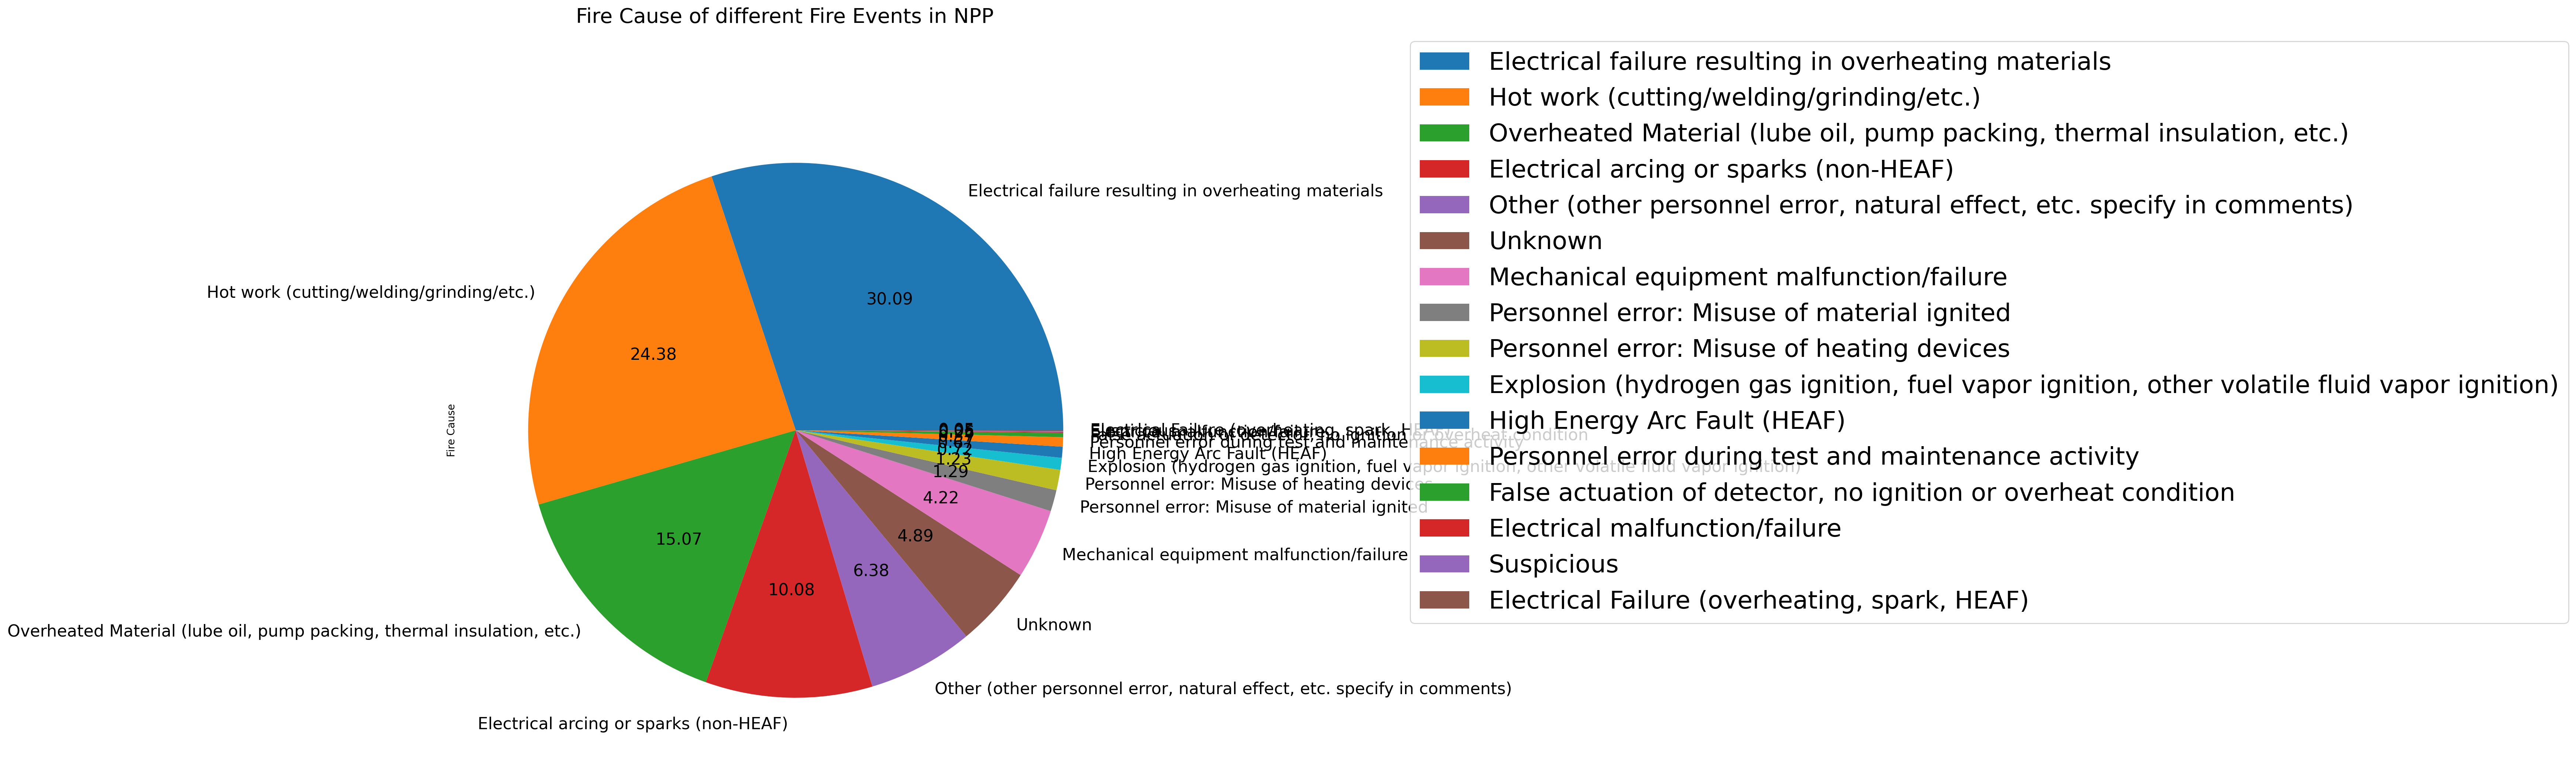

In [268]:
explode = (0, 0, 0, 0, 0, 0, 0 ,0, 0, 0, 0, 0, 0, 0, 0, 0)
fig = plt.figure(figsize=(12,12), dpi=200)
ax = plt.subplot(111)
df_main['Fire Cause'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=16)
#plt.legend(loc='upper left')
fig.suptitle('Fire Cause of different Fire Events in NPP', fontsize=20)
ax.legend(bbox_to_anchor=(1.4, 1.1), fontsize=24)
plt.show()

In [244]:
df_main.to_excel('pd_merge3.xlsx')